# Import and read all the csv files

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:

# Step 1: Define the folder containing the CSV files
folder_path = 'Charging_data/'  # Replace with your folder path

# Step 2: Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Step 3: Read each CSV file into a DataFrame
df_list = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# Step 4: Concatenate all DataFrames into one
combined_df = pd.concat(df_list, ignore_index=True)

# Step 5: Display or use the combined DataFrame
combined_df.dropna(subset = ['Local Charge Start Time','Local Charge End Time'], inplace=True)
combined_df = combined_df.reset_index()


combined_df['Local Charge Start Time'] = pd.to_datetime(combined_df['Local Charge Start Time'], format='%m/%d/%Y %H:%M')
combined_df['Local Charge End Time'] = pd.to_datetime(combined_df['Local Charge End Time'], format='%m/%d/%Y %H:%M')

In [5]:
print(type(combined_df['Local Charge End Time'][0]))
print(len(combined_df))

combined_df['Time charging'] = combined_df['Local Charge End Time'] - combined_df['Local Charge Start Time']
print(combined_df['Time charging'])

# Step 2: Convert the Series to timedelta
timedelta_series = pd.to_timedelta(combined_df['Time charging'])

# Step 3: Extract the total number of minutes
minutes_series = timedelta_series.dt.total_seconds() / 3600

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
9320
0      0 days 00:21:00
1      0 days 00:04:00
2      0 days 05:09:00
3      0 days 00:55:00
4      0 days 00:35:00
             ...      
9315   0 days 00:13:00
9316   0 days 06:43:00
9317   0 days 00:02:00
9318   0 days 00:49:00
9319   0 days 03:54:00
Name: Time charging, Length: 9320, dtype: timedelta64[ns]


(array([7.755e+03, 6.750e+02, 3.000e+02, 2.320e+02, 1.910e+02, 1.050e+02,
        4.300e+01, 1.400e+01, 4.000e+00, 1.000e+00]),
 array([ 0.  ,  1.19,  2.38,  3.57,  4.76,  5.95,  7.14,  8.33,  9.52,
        10.71, 11.9 ]),
 <BarContainer object of 10 artists>)

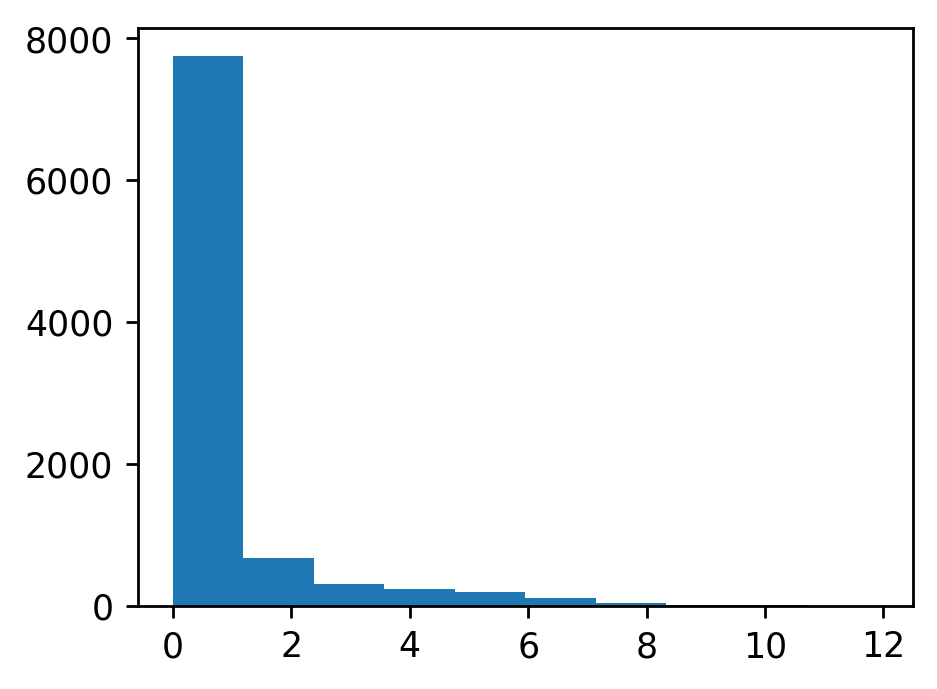

In [6]:
fig, ax = plt.subplots(figsize = (4,3), dpi = 250)

ax.hist(minutes_series)

In [13]:
df_NREL = pd.read_csv('Charging_data/NREL/data_for_fleet_dna_delivery_vans.csv')


print(df_NREL[['distance_total', 'absolute_time_duration_hrs']][0:50])


df_NREL['start_ts']= pd.to_datetime(df_NREL['start_ts'])
df_NREL['end_ts']= pd.to_datetime(df_NREL['end_ts'])
# Ensure the DataFrame is sorted by V_id and Start_ts
df_NREL = df_NREL.sort_values(by=['vid', 'start_ts'])

# Calculate the rolling difference for each V_id
df_NREL['Rolling_diff'] = df_NREL.groupby('vid').apply(
    lambda group: group['start_ts'] - group['end_ts'].shift(-1)
).reset_index(level=0, drop=True)


print(df_NREL[['distance_total', 'absolute_time_duration_hrs', 'Rolling_diff']][0:50])

df_to_write = df_NREL[['vid', 'start_ts','end_ts', 'distance_total', 'absolute_time_duration_hrs', 'Rolling_diff']]
df_to_write.to_csv('Charging_data/NREL/data_for_fleet_dna_delivery_vans_shift.csv')

    distance_total  absolute_time_duration_hrs
0        67.535063                    8.322500
1        66.972544                    8.398056
2        64.851790                   19.760278
3        72.198676                   23.233056
4        48.697382                   18.915000
5        34.936703                   21.004167
6        38.211634                    9.267222
7        41.403566                   19.206667
8        44.660983                    8.480278
9        28.658346                   18.393056
10       21.239773                   23.595556
11       28.852393                   22.068333
12       20.444753                   17.772778
13       22.617270                    8.064722
14       14.718154                   23.848333
15       19.325936                   23.696389
16       19.520276                   20.518889
17       15.541686                   17.540556
18       48.616165                   19.360000
19       47.398463                   18.790833
20       46.8

In [9]:
print(df_NREL.columns)

Index(['vid', 'did', 'pid', 'class_id', 'voc_id', 'type_id', 'drive_id',
       'fuel_id', 'day_id', 'trip_count',
       ...
       'spd_cat_7_mean_speed', 'spd_cat_7_std_speed', 'spd_cat_7_ttl',
       'spd_cat_7_zero_speed', 'spd_cat_8_distance', 'spd_cat_8_mean_speed',
       'spd_cat_8_std_speed', 'spd_cat_8_ttl', 'spd_cat_8_zero_speed',
       'Rolling_diff'],
      dtype='object', length=373)
